# IGFAE Lambda->pmunu Research

In [1]:
from numpy import *
import pandas as pd 
import matplotlib.pyplot as plt
import uproot

In [3]:
file = uproot.open("GenLpmu2018MD_wMpi.root")  #This is our Lambda->pmunu signal simulation
file2018MD = uproot.open("GenLppi2018MD_wMpi.root") ##This is our Lambda->ppi background
file2018MU = uproot.open("GenLppi2018MU_wMpi.root") ##This is our Lambda->ppi background
file2017MD = uproot.open("GenLppi2017MD_wMpi.root") ##This is our Lambda->ppi background
file2017MU = uproot.open("GenLppi2017MU_wMpi.root") ##This is our Lambda->ppi background
file2016MD = uproot.open("GenLppi2016MD_wMpi.root") ##This is our Lambda->ppi background
file2016MU = uproot.open("GenLppi2016MU_wMpi.root") ##This is our Lambda->ppi background

tree = file["T"]
tree2018MD= file2018MD["T"]
tree2018MU= file2018MU["T"]
tree2017MD= file2017MD["T"]
tree2017MU= file2017MU["T"]
tree2016MD= file2016MD["T"]
tree2016MU= file2016MU["T"]

In [4]:
pd_Signal=tree.arrays(library='pd')  
#here we create our dataframes, just with Lambda0_M and Lambda0_PT variables
pd_Background2018MD=tree2018MD.arrays(library='pd')
pd_Background2018MU=tree2018MU.arrays(library='pd')
pd_Background2017MD=tree2017MD.arrays(library='pd')
pd_Background2017MU=tree2017MU.arrays(library='pd')
pd_Background2016MD=tree2016MD.arrays(library='pd')
pd_Background2016MU=tree2016MU.arrays(library='pd')

frames=[pd_Background2018MD,pd_Background2018MU,pd_Background2017MD,pd_Background2017MU,pd_Background2016MD,pd_Background2016MU]
pd_Background=pd.concat(frames,ignore_index=True, sort=False)


/Users/dan-ioanbultoc/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:798: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


In [5]:
cutsSignal=(abs(pd_Signal['Lambda0_TRUEID'])==3122) & (abs(pd_Signal['p_TRUEID'])==2212) & (abs(pd_Signal['mu_TRUEID'])==13) & (abs(pd_Signal['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Signal['p_MC_MOTHER_ID'])==3122) & (pd_Signal['Lambda0_TRUEENDVERTEX_Z']==pd_Signal['mu_TRUEORIGINVERTEX_Z'])

pd_SignalCuts=pd_Signal[cutsSignal]

In [6]:
cutsLppi=(abs(pd_Background['Lambda0_TRUEID'])==3122) & (abs(pd_Background['p_TRUEID'])==2212) & (abs(pd_Background['mu_TRUEID'])==211) & (abs(pd_Background['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122) & (pd_Background['Lambda0_TRUEENDVERTEX_Z']==pd_Background['mu_TRUEORIGINVERTEX_Z'])
#pd_BackgroundCuts=pd_Background[(abs(pd_Background['Lambda0_TRUEID'])==3122) & (abs(pd_Background['p_TRUEID'])==2212) & (abs(pd_Background['mu_TRUEID'])==211) & (abs(pd_Background['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122)]
pd_BackgroundCutsLppi=pd_Background[cutsLppi]


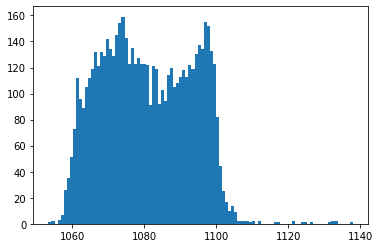

In [7]:
plt.hist(pd_BackgroundCutsLppi['Lambda0_M'], bins=100)
plt.show()

In [8]:
cutsEDIF=(abs(pd_Background['Lambda0_TRUEID']==3122)) & (abs(pd_Background['p_TRUEID']==2212)) & (abs(pd_Background['mu_TRUEID'])==13) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122) & (abs(pd_Background['mu_MC_MOTHER_ID'])==211) & (abs(pd_Background['mu_MC_GD_MOTHER_ID'])==3122) & (pd_Background['Lambda0_TRUEENDVERTEX_Z']!=pd_Background["mu_TRUEORIGINVERTEX_Z"])

pd_eDIF=pd_Background[cutsEDIF]

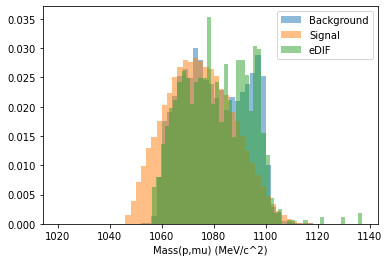

In [9]:
plt.clf()
plt.hist(pd_BackgroundCutsLppi['Lambda0_M'], range=[1020,1120],density=True,alpha=0.5, bins=50, label = 'Background')
plt.hist(pd_SignalCuts['Lambda0_M'], density=True, range=[1020,1120],alpha=0.5, bins=50, label = 'Signal')
plt.hist(pd_eDIF['Lambda0_M'], density = True, alpha=0.5, bins=50, label = 'eDIF')
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.legend()
plt.show()

In [10]:
eDIF_MppiCorr_Mppi=[]
for i in pd_eDIF.index:
#    print(i)
#    print(pd_eDIF['MppiCorr'][i],pd_eDIF['Mppi'][i])
    eDIF_MppiCorr_Mppi.append(pd_eDIF['MppiCorr'][i]-pd_eDIF['Mppi'][i])

In [11]:
Signal_MppiCorr_Mppi=[]
for i in pd_SignalCuts.index:
    Signal_MppiCorr_Mppi.append(pd_SignalCuts['MppiCorr'][i]-pd_SignalCuts['Mppi'][i])

In [12]:
Lppi_MppiCorr_Mppi=[]
for i in pd_BackgroundCutsLppi.index:
    Lppi_MppiCorr_Mppi.append(pd_BackgroundCutsLppi['MppiCorr'][i]-pd_BackgroundCutsLppi['Mppi'][i])

In [13]:
#pd_eDIF['MppiCorr'][22]-pd_eDIF['Mppi'][22]
#pd_eDIF['MppiCorr']

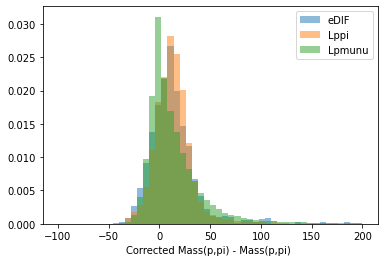

In [14]:
plt.clf()
plt.hist(eDIF_MppiCorr_Mppi,range=(-100,200),bins=50,density=True,alpha=0.5,label='eDIF')
plt.hist(Lppi_MppiCorr_Mppi,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lppi')
plt.hist(Signal_MppiCorr_Mppi,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('Corrected Mass(p,pi) - Mass(p,pi) ')
plt.legend()
plt.show()

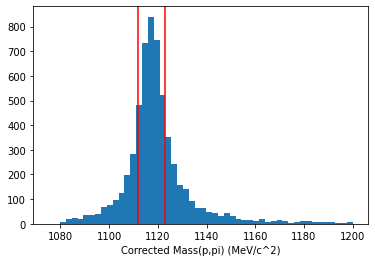

In [15]:
#MppiCorr Lppi

plt.clf()
plt.hist(pd_BackgroundCutsLppi['MppiCorr'],range=(1075,1200),bins=52)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.axvline(x=1112,color='r')
plt.axvline(x=1123,color='r')
plt.xlabel('Corrected Mass(p,pi) (MeV/c^2)')
plt.show()

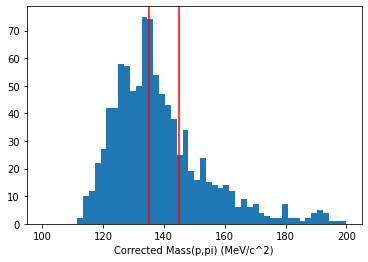

In [16]:
#Mpi2 eDIF

plt.clf()
plt.hist(pd_eDIF['Mpi2'],range=(100,200),bins=52)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
#plt.hist(pd_BackgroundCutsLppi['Mpi2'],range=(100,200),bins=52)
plt.axvline(x=135,color='r')
plt.axvline(x=145,color='r')
plt.xlabel('Corrected Mass(p,pi) (MeV/c^2)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


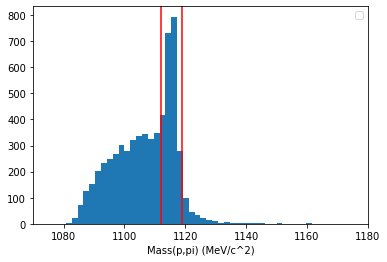

In [17]:
#Mppi Lppi

plt.clf()
plt.hist(pd_BackgroundCutsLppi['Mppi'],range=(1075,1175),bins=52)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.axvline(x=1112,color='r')
plt.axvline(x=1119,color='r')
plt.xlabel('Mass(p,pi) (MeV/c^2)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


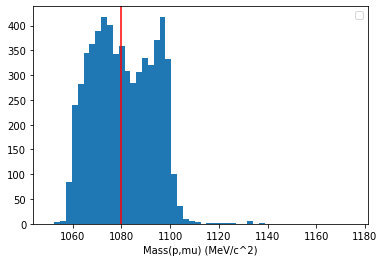

In [18]:
#Mpmu Lppi

plt.clf()
plt.hist(pd_BackgroundCutsLppi['Lambda0_M'],range=(1050,1175),bins=52)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.axvline(x=1080,color='r')
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.legend()
plt.show()

In [19]:
SelSignal=((pd_SignalCuts['Lambda0_M']<1080) & (pd_SignalCuts['Lambda0_QPT']<150) & ((pd_SignalCuts['Mpi2']<135) | (pd_SignalCuts['Mpi2']>145)) & ((pd_SignalCuts['MppiCorr']>1123) | (pd_SignalCuts['MppiCorr']<1112)) & ((pd_SignalCuts['Mppi']>1119) | (pd_SignalCuts['Mppi']<1112)) & (pd_SignalCuts['mu_ProbNNmu']>0.8) & (pd_SignalCuts['VeloMatterVeto']>3.5) & (pd_SignalCuts['Lambda0_FD_OWNPV']>100) & (pd_SignalCuts['Lambda0_BPVCORRM']>1080) & (pd_SignalCuts['Lambda0_BPVCORRM']<1145))  

pd_SignalSel=pd_SignalCuts[SelSignal]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


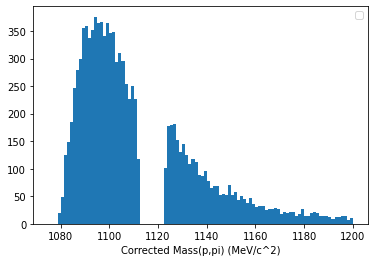

In [20]:
#Checking cuts MppiCorr
plt.clf()
plt.hist(pd_SignalSel['MppiCorr'],range=(1075,1200),bins=100)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('Corrected Mass(p,pi) (MeV/c^2)')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


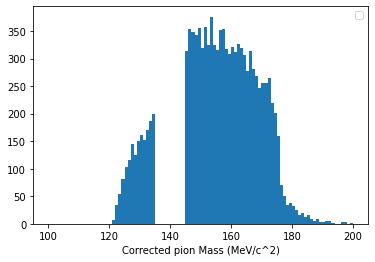

In [21]:
#Checking cuts Mpi2
plt.clf()
plt.hist(pd_SignalSel['Mpi2'],range=(100,200),bins=100)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('Corrected pion Mass (MeV/c^2)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


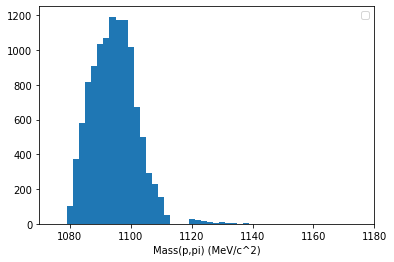

In [22]:
#Checking cuts Mppi
plt.clf()
plt.hist(pd_SignalSel['Mppi'],range=(1075,1175),bins=50)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('Mass(p,pi) (MeV/c^2)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


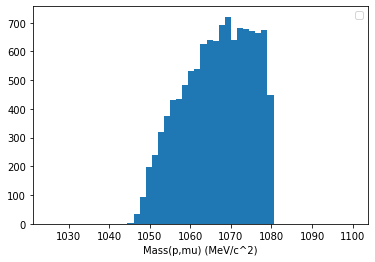

In [23]:
#Checking cuts Lambda0_M
plt.clf()
plt.hist(pd_SignalSel['Lambda0_M'],range=(1025,1100),bins=50)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


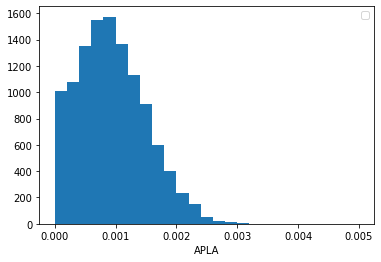

In [24]:
#APLA
plt.clf()
plt.hist(pd_SignalSel['APLA'],range=(0,0.005),bins=25)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('APLA')
plt.legend()
plt.show()

# TASKS 

In [25]:
SelLppi=((pd_BackgroundCutsLppi['Lambda0_M']<1080) & (pd_BackgroundCutsLppi['Lambda0_QPT']<150) & ((pd_BackgroundCutsLppi['Mpi2']<135) | (pd_BackgroundCutsLppi['Mpi2']>145)) & ((pd_BackgroundCutsLppi['MppiCorr']>1123) | (pd_BackgroundCutsLppi['MppiCorr']<1112)) & ((pd_BackgroundCutsLppi['Mppi']>1119) | (pd_BackgroundCutsLppi['Mppi']<1112)) & (pd_BackgroundCutsLppi['mu_ProbNNmu']>0.8) & (pd_BackgroundCutsLppi['VeloMatterVeto']>3.5) & (pd_BackgroundCutsLppi['Lambda0_FD_OWNPV']>100) & (pd_BackgroundCutsLppi['Lambda0_BPVCORRM']>1080) & (pd_BackgroundCutsLppi['Lambda0_BPVCORRM']<1145))  

pd_LppiSel=pd_BackgroundCutsLppi[SelLppi]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


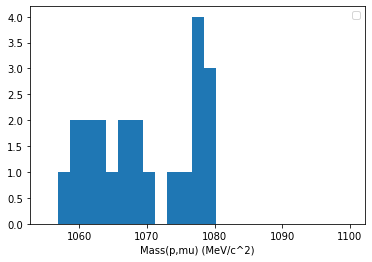

In [26]:
#Checking cuts Lambda0_M
plt.clf()
plt.hist(pd_LppiSel['Lambda0_M'],range=(1055,1100),bins=25)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


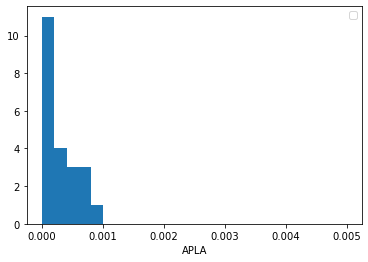

In [185]:
#APLA
plt.clf()
plt.hist(pd_LppiSel['APLA'],range=(0,0.005),bins=25)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.xlabel('APLA')
plt.legend()
plt.show()

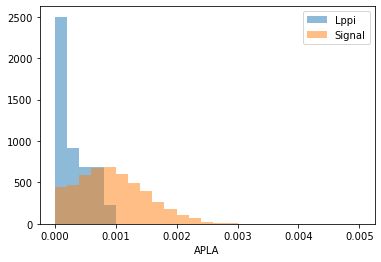

In [189]:
#APLA
plt.clf()
plt.hist(pd_LppiSel['APLA'],range=(0,0.005),bins=25, label='Lppi', density=True,alpha=0.5)#,range=(-100,200),bins=50,density=True,alpha=0.5,label='Lpmunu')
plt.hist(pd_SignalSel['APLA'],range=(0,0.005),bins=25, label='Signal', density=True,alpha=0.5)
plt.xlabel('APLA')
plt.legend()
plt.show()